# Manifold Learning



In [167]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Part 1.  Multidimensional Scaling

In [2]:
from sklearn.metrics.pairwise import euclidean_distances

# Helper functions & Datasets
from Code.optimization import gradient_descent
from Code.dataset import ten_city, synthetic_spiral

In [3]:
class color_text:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## * Classical MDS

In [4]:
def cmds(X, n_dim, input_type='raw'):
    """
    Classical(linear) multidimensional scaling (MDS)
    
    Parameters
    ----------
    X: (d, n) array or (n,n) array
        input data. The data are placed in column-major order. 
        That is, samples are placed in the matrix (X) as column vectors
        d: dimension of points
        n: number of points
        
    n_dim: dimension of target space
    
    input_type: it indicates whether data are raw or distance
        - raw: raw data. (n,d) array. 
        - distance: precomputed distances between the data. (n,n) array.
    Returns
    -------
    Y: (n_dim, n) array. projected embeddings.
    evals: (n_dim) eigen values
    evecs: corresponding eigen vectors in column vectors
    """

    if input_type == 'distance':
        D = X
    elif input_type == 'raw':
        Xt = X.T
        D = euclidean_distances(Xt,Xt)
    
    n = len(D)
    
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
     
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using eigenvalued components only                      
    indx, = np.where(evals > 0)
    evals = evals[indx]
    #Filtering for the top n eigen vectors
    evals = evals[0:n_dim]
    evecs  = evecs[:,indx]
    
    
    val  = np.diag(np.sqrt(evals))
    #val = val[0:n_dim,0:n_dim]
    evecs = evecs[:,0:n_dim]    
    
    Y  = evecs.dot(val)
    
    return Y, evals, evecs

# 
test_data = np.array([[0,3,2], [1,3,5], [-6,-3,5], [1,1,1]]).T

n_dim = 2
Y_test, evals, evecs = cmds(X=test_data, n_dim=n_dim, input_type='raw')
print( color_text.BOLD + f'{n_dim} largest eigen values:' + color_text.END)
print(evals)
print(color_text.BOLD + '\nCorresponding eigen vectors:\n',color_text.END  ,evecs.T)
print(color_text.BOLD +'\nEmbedded coordinates:\n',color_text.END,Y_test)

2 largest eigen values:
[58.77200526 10.152993  ]

Corresponding eigen vectors:
  [[-0.29850918 -0.29530012  0.86584461 -0.27203532]
 [ 0.11970309 -0.75346239 -0.01262009  0.6463794 ]]

Embedded coordinates:
  [[-2.28845802  0.38141906]
 [-2.26385638 -2.4008146 ]
 [ 6.63781607 -0.04021235]
 [-2.08550168  2.0596079 ]]


#### Classical MDS on ten_city dataset

In [5]:
# ten city dataset
flying_dist, city = ten_city()
flying_dist = flying_dist + flying_dist.T

##### 1-D Embedding

In [168]:
n_dim = 1
Y_test, evals, evecs = cmds(X=flying_dist, n_dim=n_dim, input_type='distance')
print( color_text.BOLD + f'{n_dim} largest eigen values:' + color_text.END)
print(evals)
print(color_text.BOLD + '\nCorresponding eigen vectors:\n',color_text.END  ,evecs.T)
print(color_text.BOLD +'\nEmbedded coordinates:\n',color_text.END,Y_test)

1 largest eigen values:
[9582144.29921687]

Corresponding eigen vectors:
  [[-0.23219463 -0.1234228   0.15558124 -0.05216154  0.38886659 -0.366185
  -0.34638486  0.45892474  0.43344235 -0.31646608]]

Embedded coordinates:
  [[ -718.75938065]
 [ -382.0557659 ]
 [  481.60233633]
 [ -161.46625837]
 [ 1203.73802481]
 [-1133.52707667]
 [-1072.23568624]
 [ 1420.60331937]
 [ 1341.72247895]
 [ -979.62199162]]


<IPython.core.display.Javascript object>


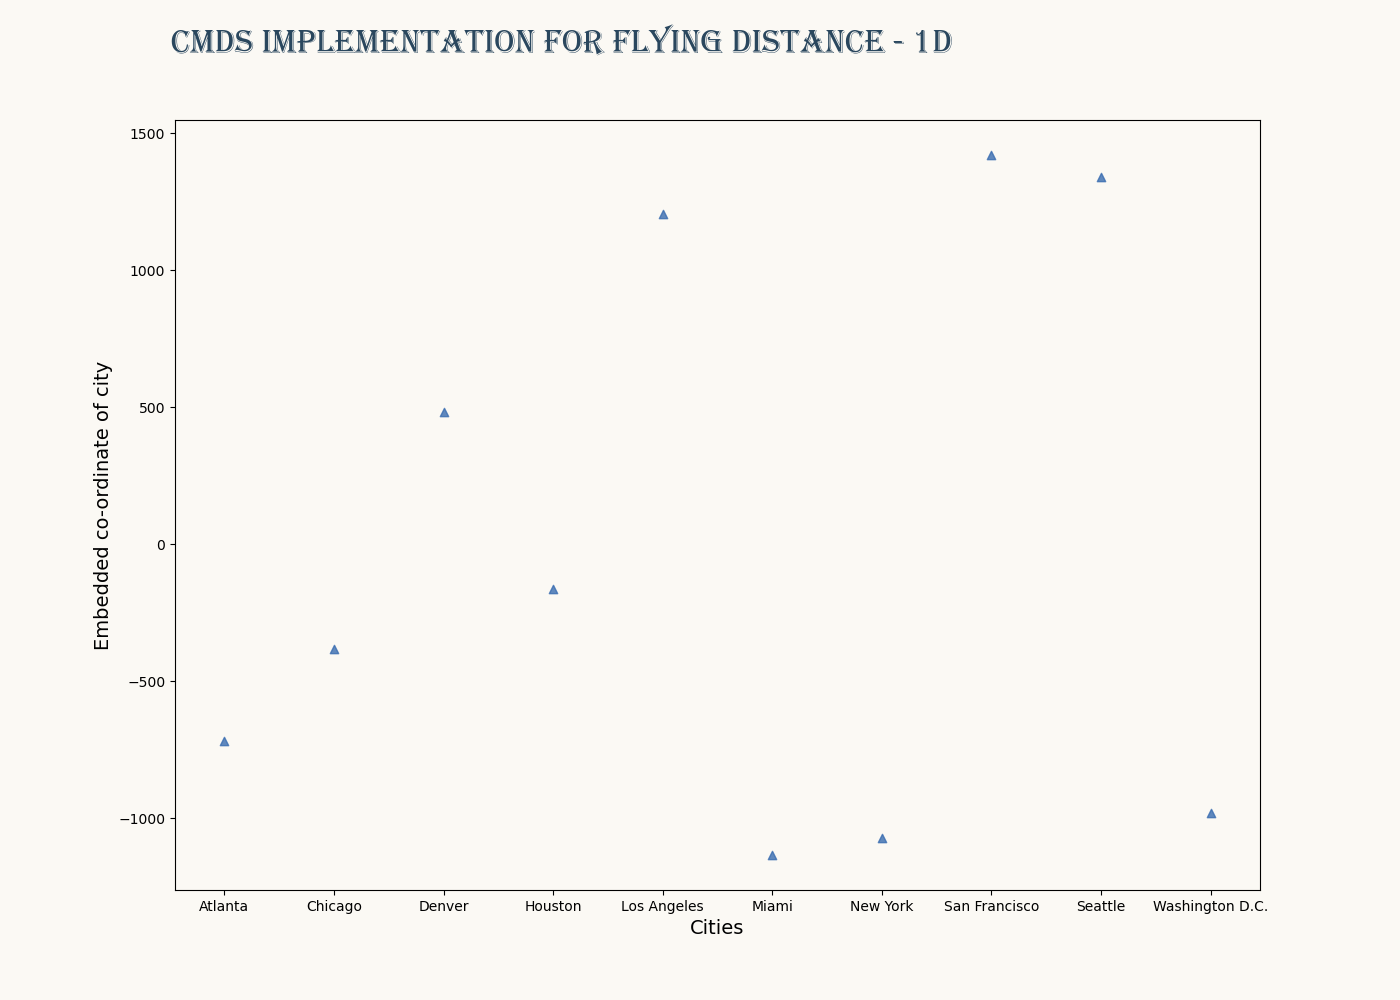

Text(0.122, 0.975, 'CMDS Implementation for Flying Distance - 1D')

In [169]:
#Plotting the 1-D embedded datapoints

import pandas as pd
from adjustText import adjust_text

df = pd.DataFrame(Y_test , columns = ['X'])

BG_WHITE = "#fbf9f4"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"

fig, ax = plt.subplots(figsize= (14, 10))
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)
plt.scatter(city,df['X'],alpha=0.8,color='#386cb0',marker='^')
ax.set_xlabel("Cities", size=14)
ax.set_ylabel("Embedded co-ordinate of city", size=14)
fig.suptitle(
    "CMDS Implementation for Flying Distance - 1D",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=24,
    fontname="Algerian",
    color=BLUE,
    weight="bold",    
)


<IPython.core.display.Javascript object>


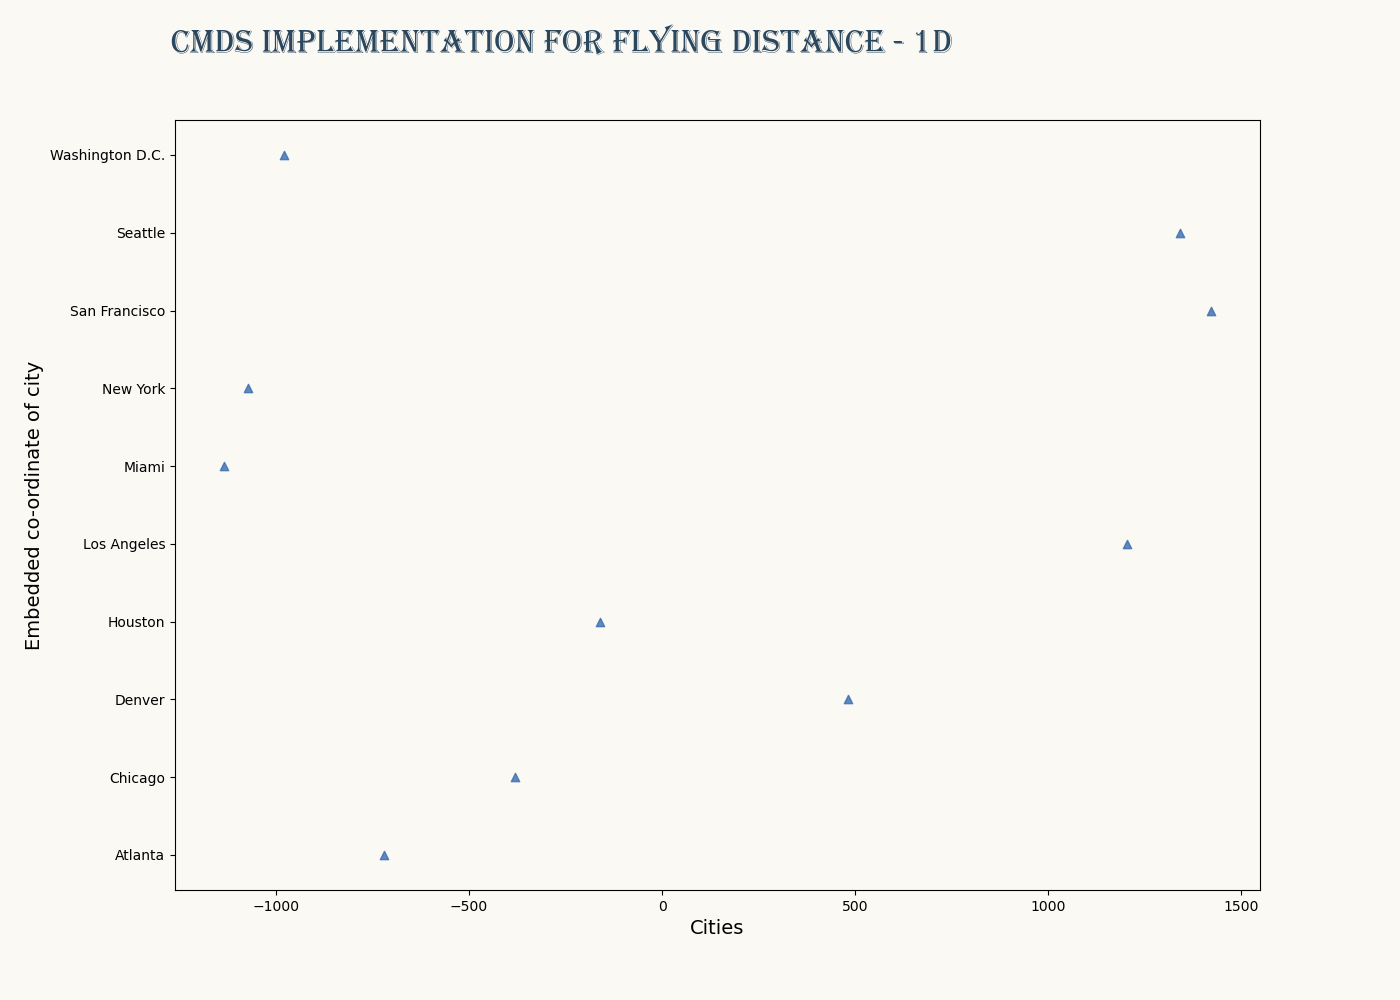

Text(0.122, 0.975, 'CMDS Implementation for Flying Distance - 1D')

In [170]:
#Plotting the 1-D embedded datapoints

import pandas as pd
from adjustText import adjust_text

df = pd.DataFrame(Y_test , columns = ['X'])

BG_WHITE = "#fbf9f4"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"

fig, ax = plt.subplots(figsize= (14, 10))
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)
plt.scatter(df['X'],city,alpha=0.8,color='#386cb0',marker='^')
ax.set_xlabel("Cities", size=14)
ax.set_ylabel("Embedded co-ordinate of city", size=14)
fig.suptitle(
    "CMDS Implementation for Flying Distance - 1D",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=24,
    fontname="Algerian",
    color=BLUE,
    weight="bold",    
)


<IPython.core.display.Javascript object>


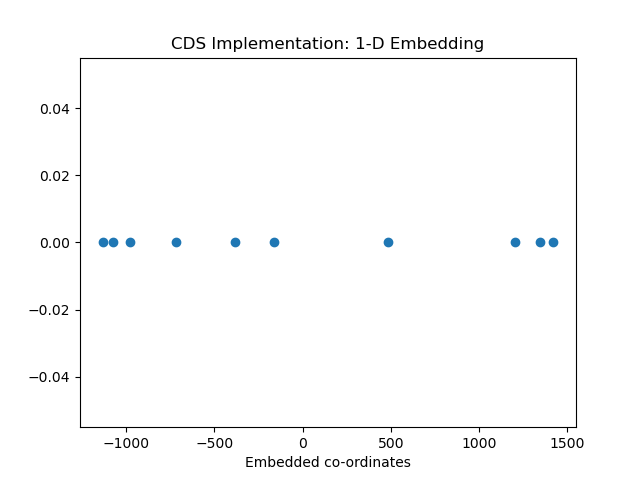

Text(0.5, 1.0, 'CDS Implementation: 1-D Embedding')

In [171]:
Y_dummy = [0 for i in range(len(Y_test))]
fig.clf()
plt.scatter(Y_test,Y_dummy)
plt.xlabel("Embedded co-ordinates")
plt.title("CDS Implementation: 1-D Embedding")

##### 2-D Embedding

In [172]:
n_dim = 2
Y_test, evals, evecs = cmds(X=flying_dist, n_dim=n_dim, input_type='distance')
print( color_text.BOLD + f'{n_dim} largest eigen values:' + color_text.END)
print(evals)
print(color_text.BOLD + '\nCorresponding eigen vectors:\n',color_text.END  ,evecs.T)
print(color_text.BOLD +'\nEmbedded coordinates:\n',color_text.END,Y_test)

2 largest eigen values:
[9582144.29921687 1686820.18346485]

Corresponding eigen vectors:
  [[-0.23219463 -0.1234228   0.15558124 -0.05216154  0.38886659 -0.366185
  -0.34638486  0.45892474  0.43344235 -0.31646608]
 [ 0.11009922 -0.26243133 -0.01946836  0.44100732  0.30035985  0.44804271
  -0.39962554  0.08668867 -0.44637343 -0.25829912]]

Embedded coordinates:
  [[ -718.75938065   142.99426901]
 [ -382.0557659   -340.83962288]
 [  481.60233633   -25.28504058]
 [ -161.46625837   572.76991083]
 [ 1203.73802481   390.10029052]
 [-1133.52707667   581.90730913]
 [-1072.23568624  -519.02423018]
 [ 1420.60331937   112.58920212]
 [ 1341.72247895  -579.73927843]
 [ -979.62199162  -335.47280955]]


<IPython.core.display.Javascript object>


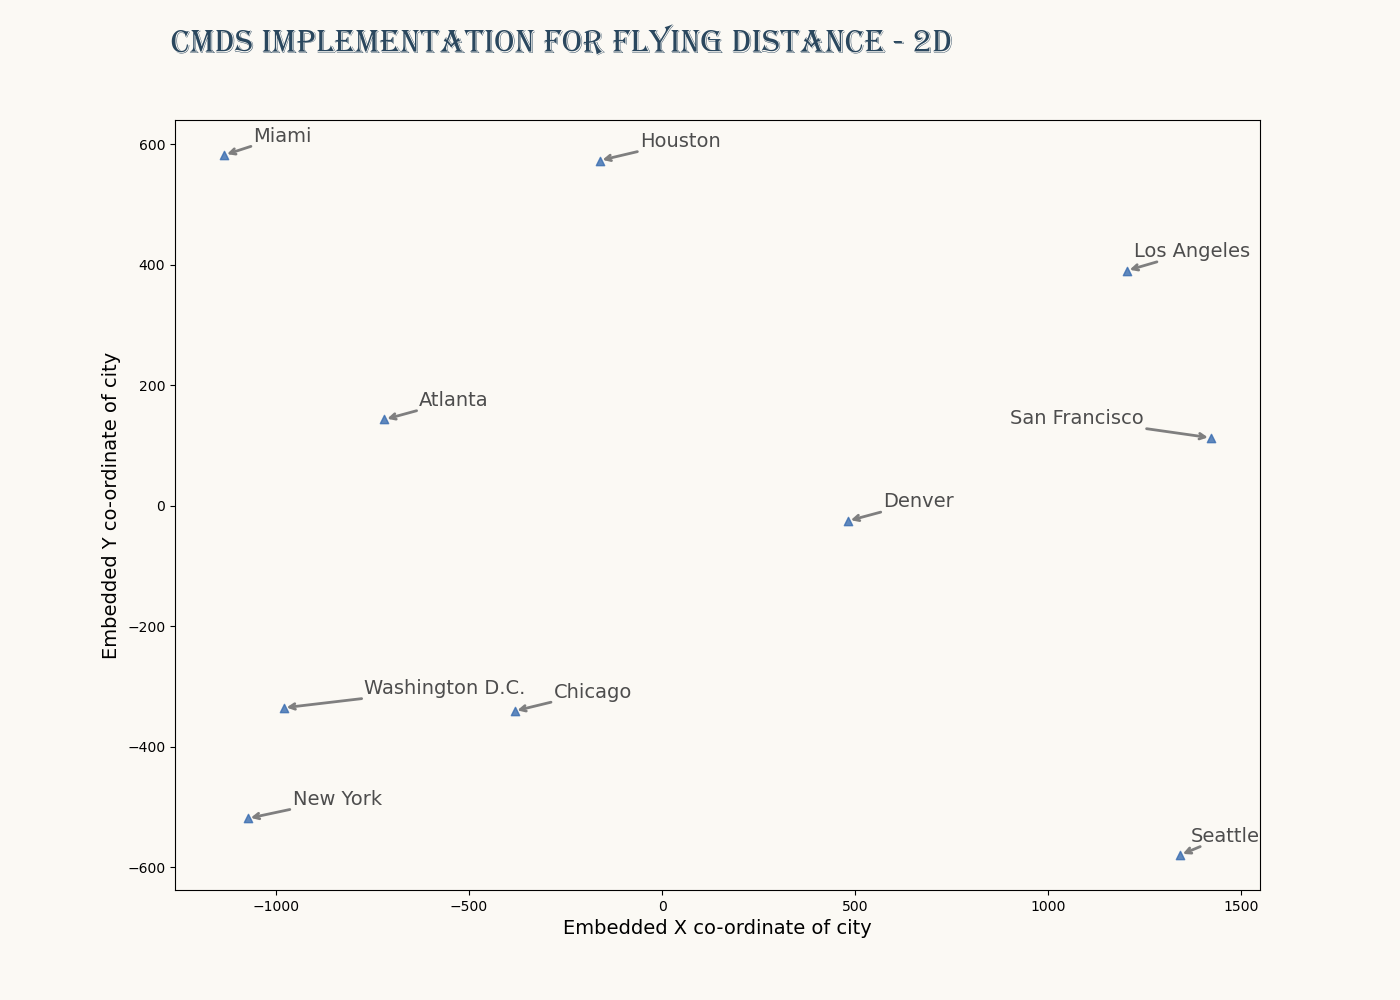

Text(0.5, 0, 'Embedded X co-ordinate of city')

In [173]:
#Plotting 2-D embedded datapoints
df = pd.DataFrame(Y_test , columns = ['X','Y'])

from adjustText import adjust_text
fig.clf()
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
GREY30 = "#4d4d4d"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
COLORS = ["#386cb0", "#fdb462", "#7fc97f" ] # A color for each species

fig, ax = plt.subplots(figsize= (14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)
TEXTS=[]
plt.scatter(df['X'],df['Y'],alpha=0.8,color='#386cb0',marker='^')
for i in range(df.shape[0]):
    TEXTS.append(ax.text(df['X'][i], df['Y'][i], city[i], color=GREY30, fontsize=14, fontname="DejaVu Sans"))

adjust_text(
    TEXTS, 
    expand_points=(2, 2),
    arrowprops=dict(
        arrowstyle="->", 
        color=GREY50, 
        lw=2
    ),
    ax=fig.axes[0]
)

fig.suptitle(
    "CMDS Implementation for Flying Distance - 2D",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=24,
    fontname="Algerian",
    color=BLUE,
    weight="bold",    
)

ax.set_ylabel("Embedded Y co-ordinate of city", size=14)
ax.set_xlabel("Embedded X co-ordinate of city", size=14)

## * Stress-based MDS

In [174]:
def loss_sammon(D, y):
    """
    Loss function (stress) - Sammon
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    stress: scalar. stress
    """
    #Computing the Distance matrix for the embedded co-ordinates
    D_t = euclidean_distances(y.T, y.T)
    #Computing the triangle matrix to eliminate duplicate entries
    D = np.triu(D)
    D_t = np.triu(D_t)
    
    #Computing the loss function
    Val = (D - D_t)*(D - D_t)/D
    Val[np.isnan(Val)] = 0
    num = Val.sum()
    den = D.sum()
    stress = num/den
    
    return stress

def grad_sammon(D, y):
    """
    Gradient function (first derivative) - Sammonn_dim
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    g: (k,n) array.
        Gradient matrix. 
        k is the dimensionality of target space.
        n is the number of points.
    """
    D_t = euclidean_distances(y.T, y.T)
    D_old = D.copy()
    
    grd_main = []
    for indx in range(D.shape[0]):
        
        D_ = D[indx,:]
        D_t_ = D_t[indx,:]
        num_denom = (D_ - D_t_)/(D_ * D_t_)
        matrix_curr = y.T[indx]
        m = y.T.copy()

        diff_m = -(m - matrix_curr)

        adjusted_num_denom = np.array([num_denom.T] * 2).T
        adjusted_num_denom[np.isnan(adjusted_num_denom)] = 0

        full = np.multiply(adjusted_num_denom, diff_m)
        full = full.sum(axis=0)

        den = D_old.sum()/2
        grd = full/den
        final_val = -2*grd
        grd_main.append(final_val,)
        
    return np.array(grd_main).T

# The following code to be used for testing student's implementation during marking. Don't change!
test_data = np.array([[0,3,2], [1,3,5], [-6,-3,5], [1,1,1]]).T
D = euclidean_distances(test_data.T, test_data.T)
y = np.array([[1,0],[1,1],[0,1],[0,0]]).T

print( color_text.BOLD + 'Stress-based MDS' + color_text.END)
loss = loss_sammon(D, y)
gradient = grad_sammon(D, y)
print( color_text.BOLD + '\nLoss:' + color_text.END,loss)
print( color_text.BOLD + 'Gradient:\n' + color_text.END,gradient)

Stress-based MDS

Loss: 0.6771513964361345
Gradient:
 [[-0.0636803  -0.07372159  0.07975297  0.05764892]
 [ 0.06861392 -0.06258254 -0.07961112  0.07357973]]


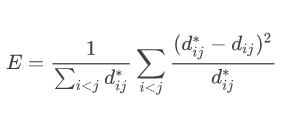

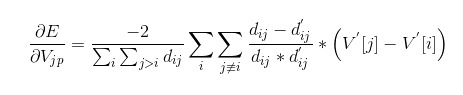

In [15]:
def stress_based_mds(x, n_dim, loss_f, grad_f, input_type='raw', 
                     lr=0.5, tol=1e-9, max_iter=6000):
    """
    Stress-based MDS
    
    Parameters
    ----------
    x: (d,n) array or (n,n) array
        If it is raw data -> (d,n) array
        otherwise, (n,n) array (distance matrix)
        n is the number of points
        d is the dimensionality of original space
    n_dim: dimensionality of target space
    loss_f: loss function
    grad_f: gradient function
    input_type: 'raw' or 'distance'
    init: initialisation method
        random: Initial y is set randomly
        fixed: Initial y is set by pre-defined values
    max_iter: maximum iteration of optimization
    
    Returns
    -------
    y: (n_dim,n) array. Embedded coordinates in target space
    losses: (max_iter,) History of stress
    """
    # obtain distance
    if input_type == 'raw':
        x_t = x.T
        D = euclidean_distances(x_t, x_t)
    elif input_type == 'distance':
        D = x
    else:
        raise ValueError('inappropriate input_type')
    
    # Remaining initialisation
    N = x.shape[1]

    np.random.seed(10)
    # Initialise y randomly
    y = np.random.normal(0.0,1.0,[n_dim,N])
    # calculate optimal solution (embedded coordinates)
    y, losses = gradient_descent(D, y, loss_f, grad_f, lr, tol, max_iter)
    
    return y, losses

<IPython.core.display.Javascript object>


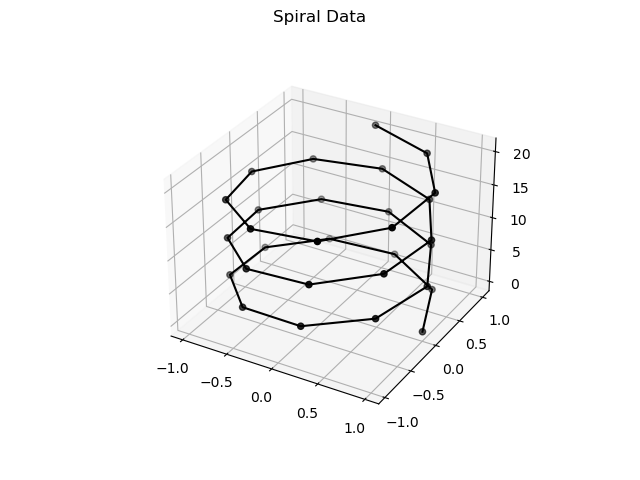

In [16]:
X_spiral = synthetic_spiral()

fig_spiral = plt.figure()
fig_spiral.suptitle('Spiral Data')

# Add 3d scatter plot
ax = fig_spiral.add_subplot(projection='3d')
ax.scatter(X_spiral[0,:], X_spiral[1,:], X_spiral[2,:], c='k')
ax.plot(X_spiral[0,:], X_spiral[1,:], X_spiral[2,:], c='k');

#### Hyperparameter tuning

**Performing a search for learning rate in range [0.1,10]**

In [17]:
loss_ls = []
lr_ls = np.linspace(0.1,10,num=20)
for lr_val in lr_ls:
    Y_pred,loss=stress_based_mds(X_spiral, 2, loss_sammon, grad_sammon, input_type='raw',lr=lr_val, tol=1e-8, max_iter=6000)
    loss_ls.append(loss)

iter: 5999, stress: 0.39592722418087345	

iter: 5999, stress: 0.003626571913277876		

iter: 5999, stress: 0.0017343879953052317		

iter: 5999, stress: 0.0016513891856888836				

iter: 5999, stress: 0.0016125518902854164	

iter: 5999, stress: 0.0015776671258808301	

iter: 5999, stress: 0.0015436121758176994	

iter: 5999, stress: 0.0015104478681142346		

iter: 5999, stress: 0.0014787760581339861	

iter: 5999, stress: 0.001449060754179123		

iter: 5999, stress: 0.0014215464121020017		

iter: 5999, stress: 0.001396348207265327			

iter: 5999, stress: 0.0013735113786238517			

iter: 5999, stress: 0.0013530088000636919	

iter: 5999, stress: 0.001334730080954142			

iter: 5999, stress: 0.001318502256667413		

iter: 5999, stress: 0.0013041118056592086	

iter: 5999, stress: 0.0012913237637081664	

iter: 5999, stress: 0.0012799016064035085	

iter: 5999, stress: 0.001269618724574625		



<IPython.core.display.Javascript object>


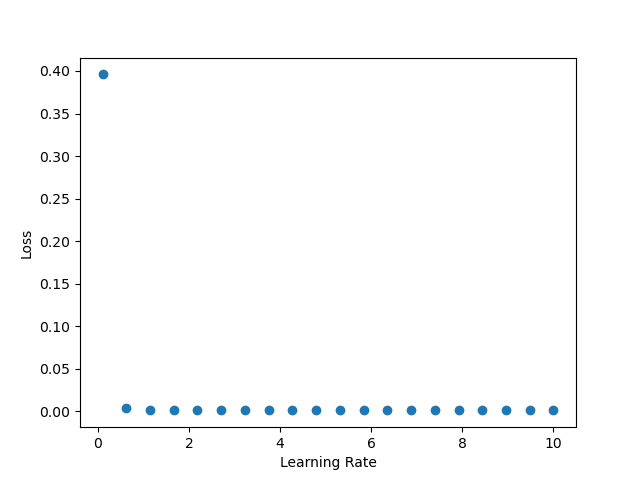

Text(0, 0.5, 'Loss')

In [18]:
loss_f = []
for i in range(len(loss_ls)):
    loss_f.append(np.min(loss_ls[i]))
fig, ax = plt.subplots()
plt.scatter(lr_ls,loss_f)
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [21]:
for i in range(len(loss_ls)):
    print(f"Learning Rate: {lr_ls[i]}  Loss:{loss_f[i]}")

Learning Rate: 0.1  Loss:0.39592722418087345
Learning Rate: 0.6210526315789474  Loss:0.003626571913277876
Learning Rate: 1.142105263157895  Loss:0.0017343879953052317
Learning Rate: 1.6631578947368424  Loss:0.0016513891856888836
Learning Rate: 2.18421052631579  Loss:0.0016125518902854164
Learning Rate: 2.7052631578947373  Loss:0.0015776671258808301
Learning Rate: 3.2263157894736847  Loss:0.0015436121758176994
Learning Rate: 3.747368421052632  Loss:0.0015104478681142346
Learning Rate: 4.268421052631579  Loss:0.0014787760581339861
Learning Rate: 4.7894736842105265  Loss:0.001449060754179123
Learning Rate: 5.310526315789474  Loss:0.0014215464121020017
Learning Rate: 5.831578947368421  Loss:0.001396348207265327
Learning Rate: 6.352631578947369  Loss:0.0013735113786238517
Learning Rate: 6.873684210526316  Loss:0.0013530088000636919
Learning Rate: 7.394736842105264  Loss:0.001334730080954142
Learning Rate: 7.915789473684211  Loss:0.001318502256667413
Learning Rate: 8.436842105263159  Loss:0.

After learning rate is set to 1.14, the drop in the loss function is miniscule.<br>
Since the loss(stress) is pretty close to zero and the drop in value is pretty low, we can pick 1.1 to be the learning rate.<br>We can pick a higher learning rate as well, but it is advisable to have lower learning rates to prevent overshooting the gradient adjustment.

**Performing a search for tolerance in range**

Picking the 1.14 as learning rate value and performing a search for tolerance

In [28]:
loss_ls = []
tol_ls = [1e-4,1e-3,1e-2,1e-1]
for tol_v in tol_ls:
    Y_pred,loss=stress_based_mds(X_spiral, 2, loss_sammon, grad_sammon, input_type='raw',lr=1.14, tol=tol_v, max_iter=6000)
    loss_ls.append(loss)

iter: 5999, stress: 0.0017351294416936497	

iter: 5999, stress: 0.0017351294416936497	

iter: 2549, stress: 0.0099854032590927	8	

iter: 1500, stress: 0.09983217643475346	



With tolerance set to 1e-4 and 1e-3, there is not difference since the threshold is too low to have early stopping and the number of iterations are as is.<br>
With tolerance set to 1e-1, the loss is 0.099; which was originally ~0.0017, meaning the value is off by 57%<br>
And in case of tolerance set to 1e-2, the loss is 0.0099, meaning the value is off by 4%.<br>**Clearly the tolerance should be set to 1e-2.**

iter: 2549, stress: 0.0099854032590927	8			



<IPython.core.display.Javascript object>


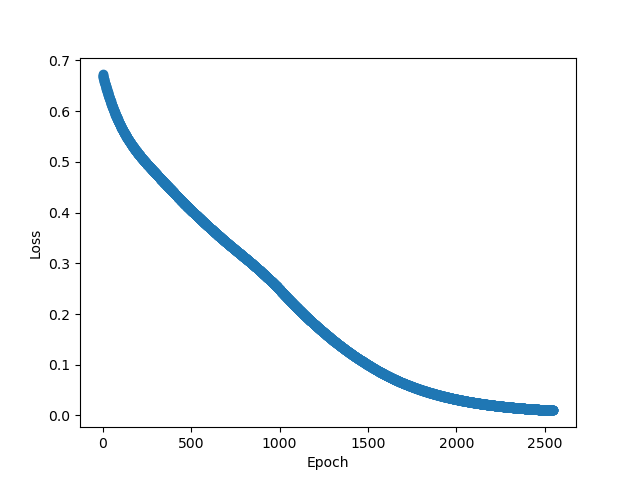

Text(0, 0.5, 'Loss')

In [29]:
Y_pred,loss=stress_based_mds(X_spiral, 2, loss_sammon, grad_sammon, input_type='raw',lr=1.14, tol=1e-2, max_iter=6000)

epoch_ls = [i for i in range(loss.shape[0])]
fig, ax = plt.subplots()
plt.scatter(epoch_ls,loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

<IPython.core.display.Javascript object>


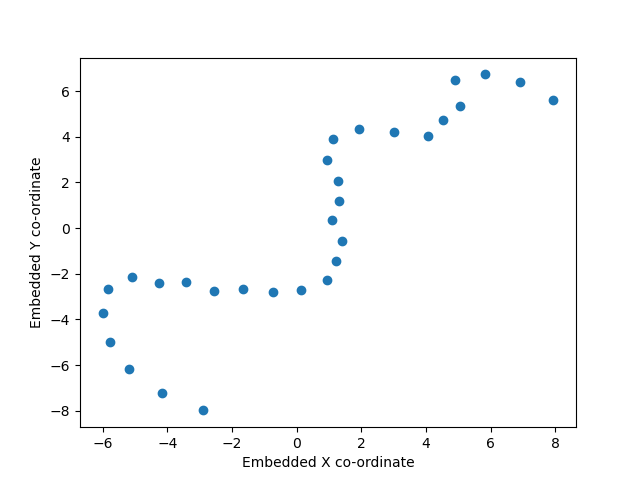

Text(0, 0.5, 'Embedded Y co-ordinate')

In [30]:
import pandas as pd

df = pd.DataFrame(Y_pred.T , columns = ['X','Y'])
fig, ax = plt.subplots()
plt.scatter(df['X'],df['Y'])
plt.xlabel("Embedded X co-ordinate")
plt.ylabel("Embedded Y co-ordinate")

## Part 2. Isometric Feature Mapping (ISOMAP)

In [110]:
from sklearn.metrics.pairwise import euclidean_distances
from Code.helpers import VIS_Shortest_path_2d, ImageViewer

In [106]:
def fixed_radius_distance(X, epsilon):
    """
    Calculate epsilon-NN
    
    Parameters
    ----------
    X: (d,n) array, where n is the number of points and d is its dimension
    epsilon: criterion of selecting neighbors
        Select points as its neighbours if distance < epsilon
        
    Returns
    -------
    nbrs_dist: (n,k*) array
        It is filled with distances with neighbors. 
        In each row, k* varies according to the number of neighbours
        Each row corresponds to a specific point (row-major order)
    nbrs_idx: (n,k*) array
        It is filled with the indices of neighbors. 
        In each row, k* varies according to the number of neighbours
        Each row corresponds to a specific point (row-major order)
    """
    D = euclidean_distances(X.T, X.T)
    
    nbrs_dist = []
    nbrs_idx = []
    cnt = 0
    for i in D:
        indx, = np.where(i < epsilon)
        sub_indices = np.ix_([cnt],indx)   
        val = D[sub_indices] 
        
        nbrs_dist.append(val[0])
        nbrs_idx.append(indx)
        cnt+=1
    return nbrs_dist, nbrs_idx

def nearest_neighbor_distance(X, n_neighbors):
    """
    Calculate K-NN
    
    Parameters
    ----------
    X: (d,n) array, where n is the number of points and d is its dimension
    n_neighbors: number of neighbors
        Select n_neighbors(k) nearest neighbors

    Returns
    -------
    dist: (n,k) array
        It is filled with distances with neighbors. 
        In each row, k varies according to the number of neighbours
        Each row corresponds to a specific point (row-major order)
    nbrs: (n,k) array
        It is filled with the indices of neighbors. 
        In each row, k varies according to the number of neighbours
        Each row corresponds to a specific point (row-major order)
    """
    
    D = euclidean_distances(X.T, X.T)
    D_sorted = np.sort(D)
    D_indx = np.argsort(D)
    
    nbrs_dist = D_sorted[:,1:n_neighbors+1]    
    nbrs_idx = D_indx[:,1:n_neighbors+1]
    
    return nbrs_dist, nbrs_idx

# The following code to be used for testing student's implementation during marking. Don't change!
test_data = np.array([[0,3,2], [1,3,5], [-6,-3,5], [1,1,1]]).T
dist, idx = fixed_radius_distance(test_data, 9.1)

print(color_text.BOLD + "\nUsing Fixed Radius:\n" + color_text.END)
print(color_text.BOLD + "Neighbour Distance:\n" + color_text.END,dist)
print(color_text.BOLD + "Neighbour Index:\n" + color_text.END,idx)
dist, idx = nearest_neighbor_distance(test_data, 2)
print(color_text.BOLD + "\n\nUsing k-Nearest Neighbour:\n" + color_text.END)
print(color_text.BOLD + "Neighbour Distance:\n" + color_text.END,dist)
print(color_text.BOLD + "Neighbour Index:\n" + color_text.END,idx)


Using Fixed Radius:

Neighbour Distance:
 [array([0.        , 3.16227766, 9.        , 2.44948974]), array([3.16227766, 0.        , 4.47213595]), array([9., 0., 9.]), array([2.44948974, 4.47213595, 9.        , 0.        ])]
Neighbour Index:
 [array([0, 1, 2, 3], dtype=int64), array([0, 1, 3], dtype=int64), array([0, 2, 3], dtype=int64), array([0, 1, 2, 3], dtype=int64)]


Using k-Nearest Neighbour:

Neighbour Distance:
 [[2.44948974 3.16227766]
 [3.16227766 4.47213595]
 [9.         9.        ]
 [2.44948974 4.47213595]]
Neighbour Index:
 [[3 1]
 [0 3]
 [0 3]
 [0 1]]


In [107]:
def isomap(x, n_components, n_neighbors=None, epsilon=None, dist_func=None, cmds_func=None):
    """
    ISOMAP
    
    Parameters
    ----------
    x: (d,n) array, where n is the number of points and n is its dimensionality.
    n_components: dimentionality of target space
    n_neighbors: the number of neighourhood
    epsilon: fixed radius
    dist_func: function for calculating distance matrix
    
    Returns
    -------
    Y: (d,n) array. Embedded coordinates from cmds in Step 3.
    dist_mat: (n,n)array. Distance matrix made in Step 1.
    predecessors: predecessors from "shortest_path" function in Step 2.
    """
    assert(cmds_func is not None)
    assert((epsilon is not None) or (n_neighbors is not None))

    n_points = x.shape[1]

    # Step 1.
    # find nearest neighbors to each sample with the given condition
    if n_neighbors is not None:
        neighs,indxs = dist_func(x,n_neighbors)
    else:
        neighs,indxs = dist_func(x,epsilon)
        
    n_comp = x.shape[1]
    f_d = np.zeros((n_comp,n_comp))
    
    a = np.linspace(0,n_comp-1, num=n_comp,dtype=int)
    for row in range(n_comp):

        vals = [i for i in a if i not in indxs[row]]
        sub_indices = np.ix_([row],vals)
        f_d[sub_indices] = 0

        sub_indices = np.ix_([row],indxs[row])
        vals = [i for i in a if i not in indxs[row]]
        f_d[sub_indices] = neighs[row]
    # Step 2.
    # Find shortest paths
    from scipy.sparse import csr_matrix
    from scipy.sparse.csgraph import shortest_path
    
    graph = csr_matrix(f_d)
    dist_matrix,predecessors = shortest_path(csgraph=graph, directed=False,return_predecessors=True)
    
    # Step 3.
    # Apply cMDS
    
    Y,e1,e2 = cmds(dist_matrix, n_components, input_type='distance')

    return Y, dist_matrix, predecessors

# The following code to be used for testing student's implementation during marking. Don't change!
test_data = np.array([[0,3,2], [1,3,5], [-6,-3,5], [1,1,1]]).T
n_components = 2
n_neighbors = 2
Y_nn, dist_nn, predecessors_nn = isomap(test_data, 
                                            n_components, 
                                            n_neighbors=n_neighbors, 
                                            dist_func=nearest_neighbor_distance, 
                                            cmds_func=cmds)
print(color_text.BOLD + "\nEmbedded values:\n" + color_text.END,Y_nn)
#print(dist_nn)
#print(predecessors_nn)


Embedded values:
 [[-1.53779536  0.54291307]
 [-4.68615915  0.95571131]
 [ 7.46351727  0.39708534]
 [-1.23956276 -1.89570972]]


### Example with Swiss Roll

In [62]:
from sklearn.datasets import make_swiss_roll

n_points = 1000
data_s_roll, color = make_swiss_roll(n_points,random_state=42)
data_s_roll = data_s_roll.T

<IPython.core.display.Javascript object>


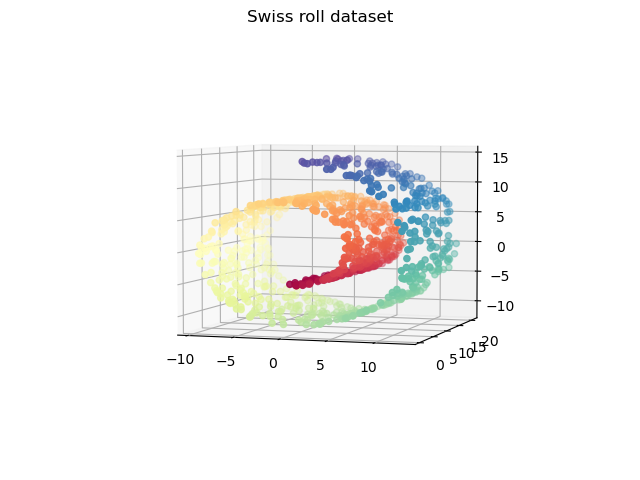

In [55]:
fig_swiss_roll = plt.figure()
fig_swiss_roll.suptitle("Swiss roll dataset")

# Add 3d scatter plot
ax = fig_swiss_roll.add_subplot(projection='3d')
ax.scatter(data_s_roll[0,:], data_s_roll[1,:], data_s_roll[2,:], c=color, 
           cmap=plt.cm.Spectral)
ax.view_init(4, -72);

In [141]:
Y_nn, dist_nn, predecessors_nn = isomap(data_s_roll, 
                                            n_components, 
                                            n_neighbors=6, 
                                            dist_func=nearest_neighbor_distance, 
                                            cmds_func=cmds)
print(color_text.BOLD + "\nEmbedded values:\n" + color_text.END,Y_nn)


Embedded values:
 [[-13.56997918  -7.05016536]
 [ 49.55691605   1.4315483 ]
 [ 22.20999874   9.65558401]
 ...
 [-30.4395931  -11.46348384]
 [ 49.55178521 -12.02475645]
 [ -7.67800633  -5.32342943]]


<IPython.core.display.Javascript object>


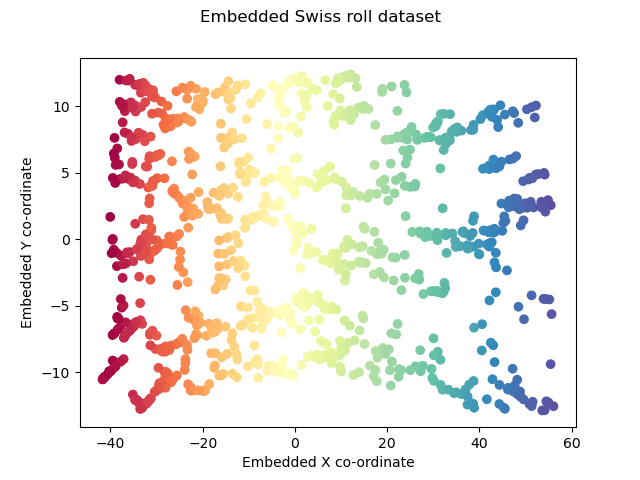

Text(0, 0.5, 'Embedded Y co-ordinate')

In [64]:
fig_swiss_roll = plt.figure()
fig_swiss_roll.suptitle("Embedded Swiss roll dataset")

# Add 3d scatter plot
ax = fig_swiss_roll.add_subplot()
ax.scatter(Y_nn.T[0,:], Y_nn.T[1,:], c=color, 
           cmap=plt.cm.Spectral)
plt.xlabel("Embedded X co-ordinate")
plt.ylabel("Embedded Y co-ordinate")

### Example with face data

In [65]:
from Code.dataset import face_tenenbaum

data_face = face_tenenbaum()
print(data_face.shape)
image_size = [64,64]

(4096, 698)


In [66]:
n_components = 2
n_neighbors = 6
Y_face, dist_face, predecessors_face = isomap(data_face, n_components, 
                                              n_neighbors=n_neighbors, 
                                              dist_func=nearest_neighbor_distance, 
                                              cmds_func=cmds)

<IPython.core.display.Javascript object>


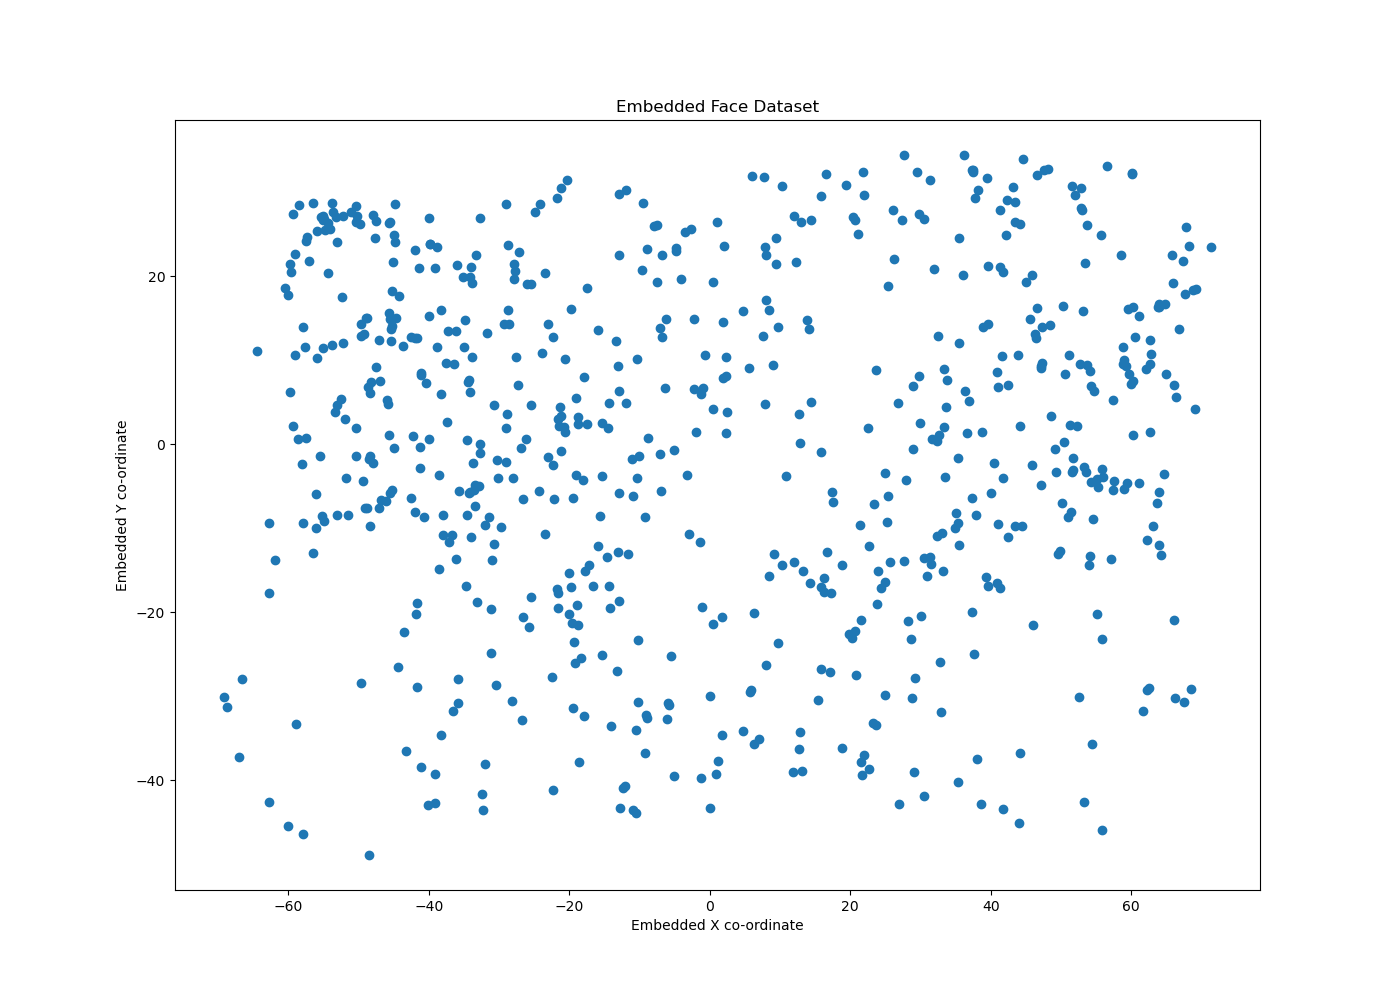

Text(0, 0.5, 'Embedded Y co-ordinate')

In [67]:
fig, ax = plt.subplots(figsize= (14, 10))
import pandas as pd
df = pd.DataFrame(Y_face , columns = ['X','Y'])
plt.scatter(df['X'],df['Y'])
plt.title("Embedded Face Dataset")
plt.xlabel("Embedded X co-ordinate")
plt.ylabel("Embedded Y co-ordinate")

<IPython.core.display.Javascript object>


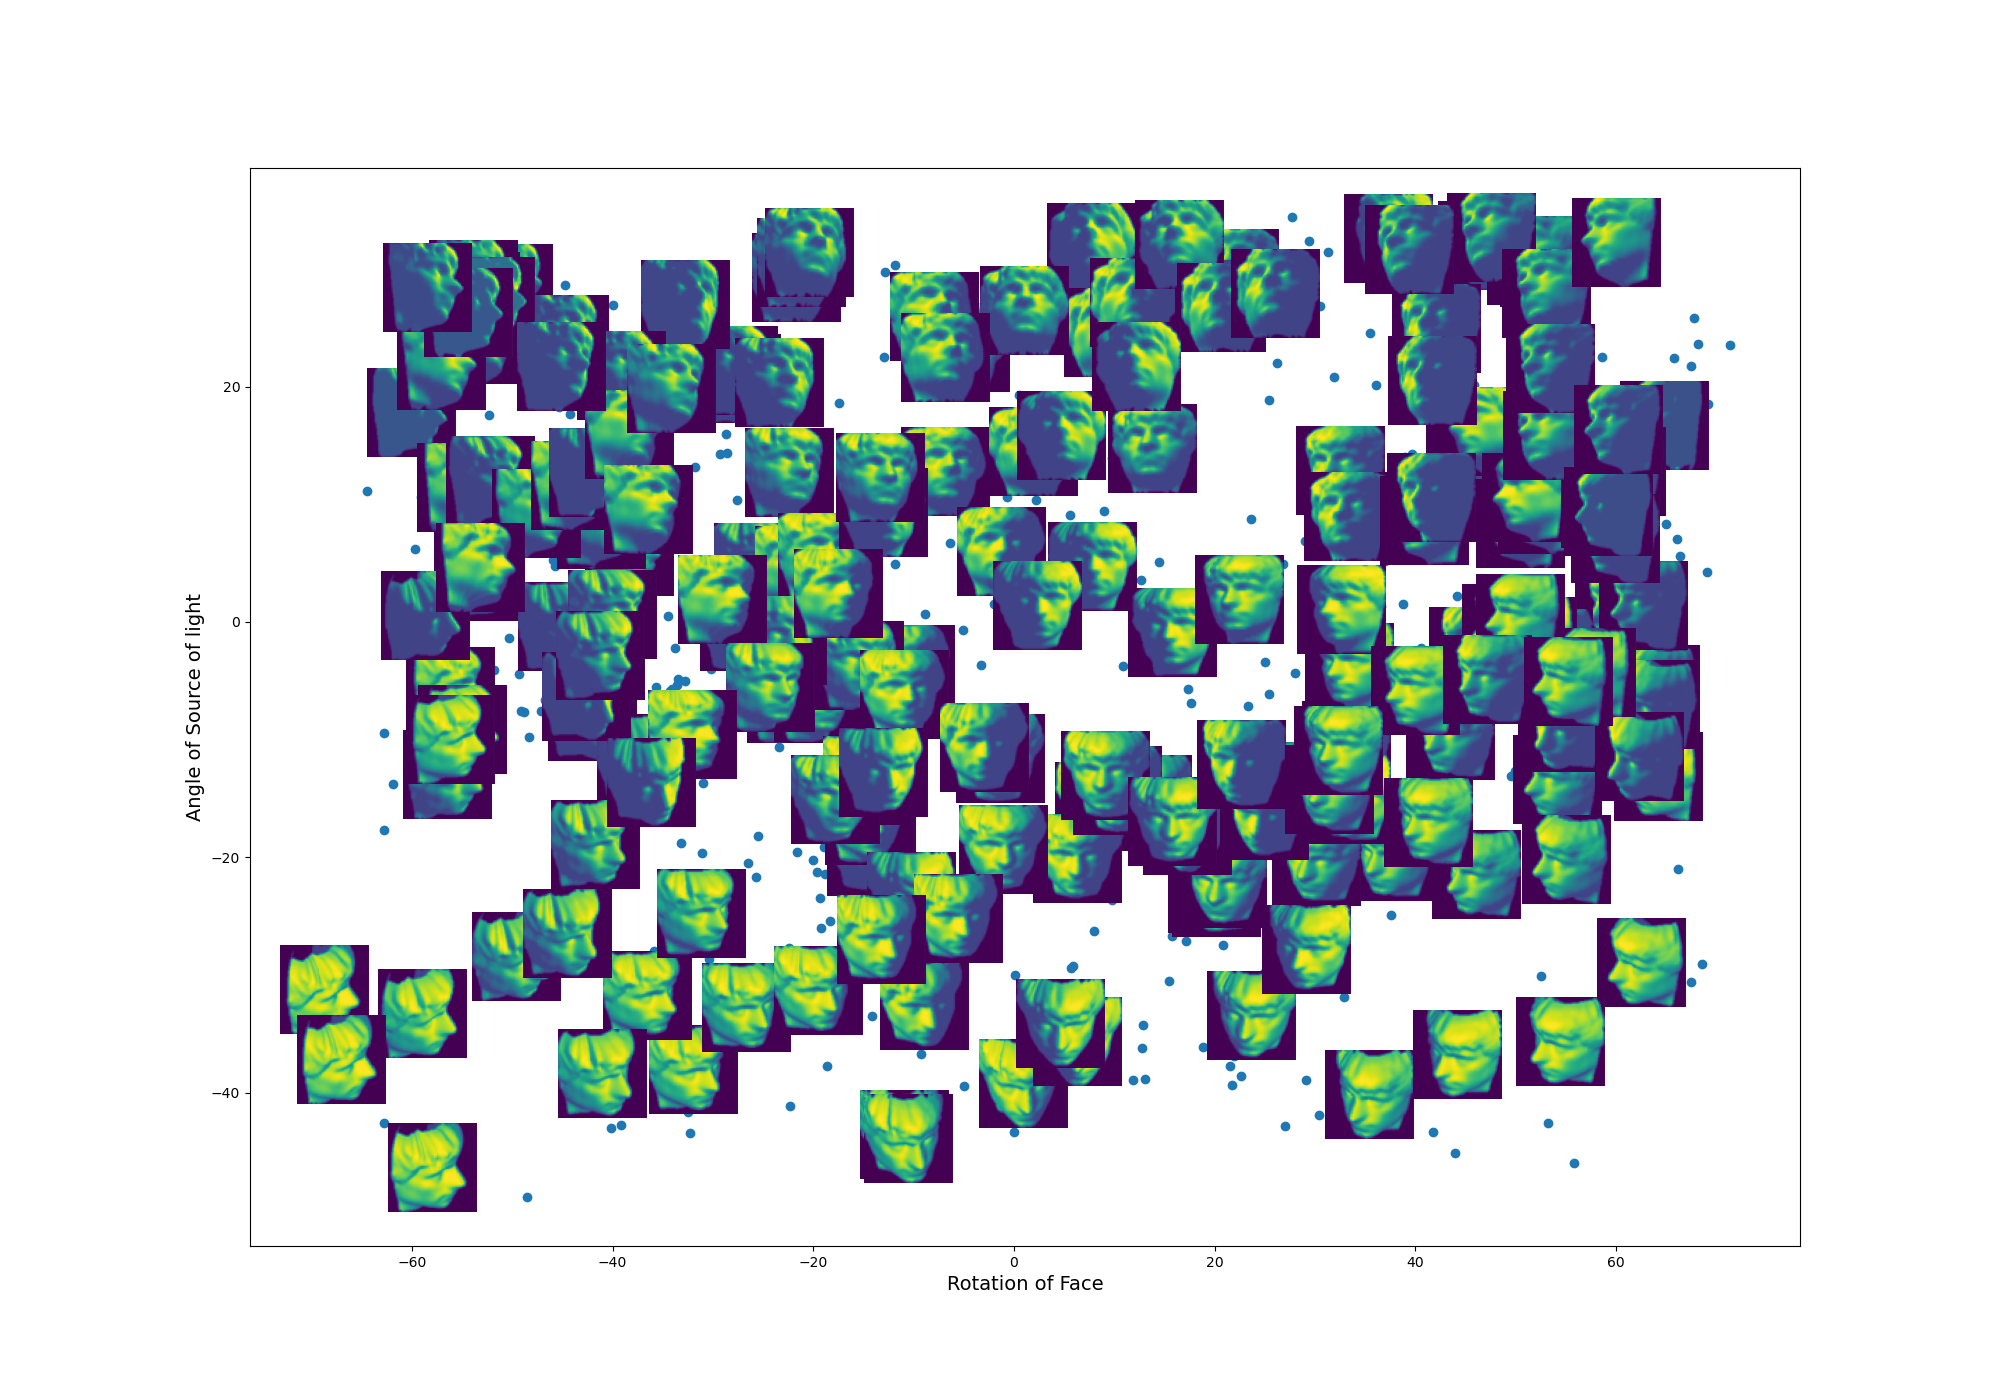

In [69]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(cnt):
    
    img = OffsetImage(np.flip(data_face.T[cnt].reshape((64,64)), 1))
    return img
    #return OffsetImage(plt.imread(path))

fig, ax = plt.subplots(figsize= (20, 14))
ax.scatter(df['X'], df['Y']) 
plt.xlabel("Rotation of Face",size=14)
plt.ylabel("Angle of Source of light",size=14)

for i in range(len(data_face.T)-500):
    ab = AnnotationBbox(getImage(i), (df.loc[i][0], df.loc[i][1]), frameon=False)
    ax.add_artist(ab)

The embedded representation of the faces coupled with the actual higher dimension images show that the images on the right side of the graph look to the left, the ones on the left to the right, the ones on the upper side look up and are away from the source of light and the ones below look down so faces turn in the light direction. <br>
Another approach is when looking at this graph, it can be easily determined where the camera from which the photo was taken is located. <br>
It is the picture of the same person, but taken from different angles and different lighting angles as revealed from the above graph.<br>
Images with similar attributes: rotation of face and lighting stick together sincce they share the attributes.

#### Shortest path of specific two points

In [108]:
def get_shortest_path(predecessors, start_idx, end_idx):
    path = [end_idx]
    k = end_idx
    while predecessors[start_idx, k] != -9999:
        path.append(predecessors[start_idx, k])
        k = predecessors[start_idx, k]
    return path[::-1]

<IPython.core.display.Javascript object>


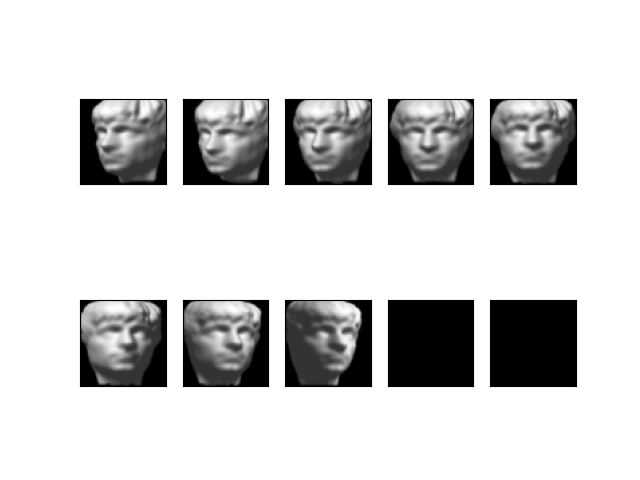

In [206]:
image_size=[64,64]
start_idx=0
end_idx=1
path=get_shortest_path(predecessors_face,start_idx,end_idx)
fig=plt.figure()
img_viewer=ImageViewer(data_face,path,image_size,fig,5)
img_viewer.show()

In [208]:
path

[0, 2, 84, 687, 682, 444, 512, 1]

#### Path 1

<IPython.core.display.Javascript object>


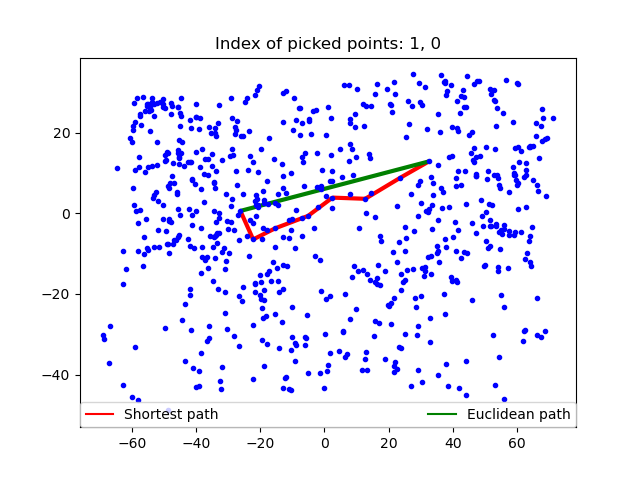

In [205]:
fig_face_index_h = plt.figure()
vis_face_index_h = VIS_Shortest_path_2d(Y_face.T[0:2], dist_face[0:2], predecessors_face, 
                                        fig_face_index_h)

<IPython.core.display.Javascript object>


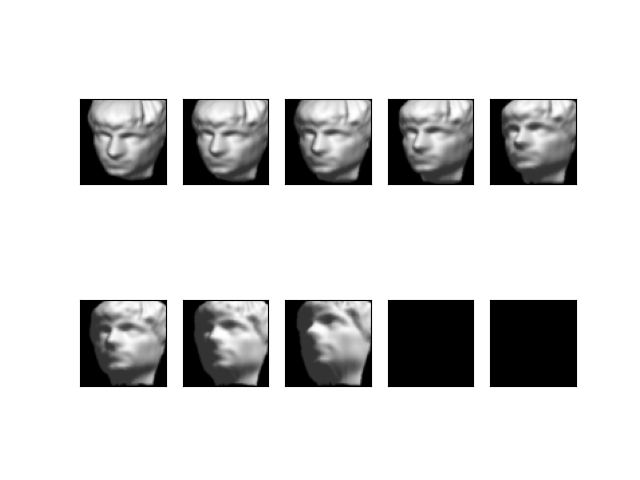

In [240]:
image_size=[64,64]
start_idx=312
end_idx=254
path=get_shortest_path(predecessors_face,start_idx,end_idx)
fig=plt.figure()
img_viewer=ImageViewer(data_face,path,image_size,fig,5)
img_viewer.show()

In [241]:
path

[312, 236, 684, 19, 122, 128, 297, 254]

#### Path 2

<IPython.core.display.Javascript object>


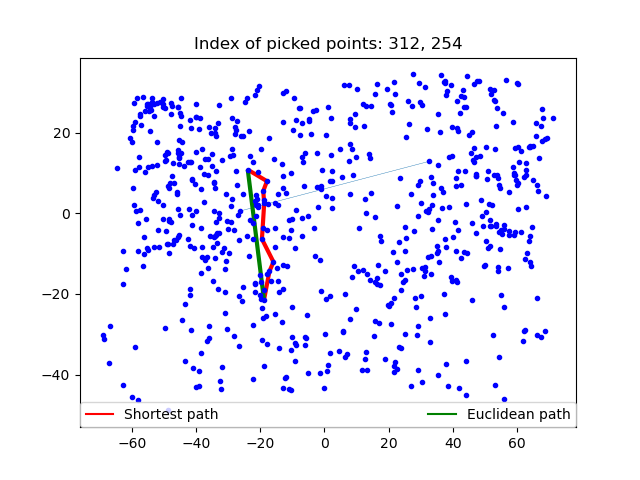

In [239]:
fig_face_index_v = plt.figure()
vis_face_index_v = VIS_Shortest_path_2d(Y_face.T[0:2], dist_face[0:2], predecessors_face, 
                                        fig_face_index_v)

## Part 3. Locally Linear Embedding (LLE) 

In [70]:
from scipy.stats import pearsonr, spearmanr
from Code.helpers import VIS_Bars
from Code.lle import lle

In [71]:
from sklearn.datasets import make_s_curve
n_points = 1000
X, angle = make_s_curve(n_points, random_state=0)
X = X.T

<IPython.core.display.Javascript object>


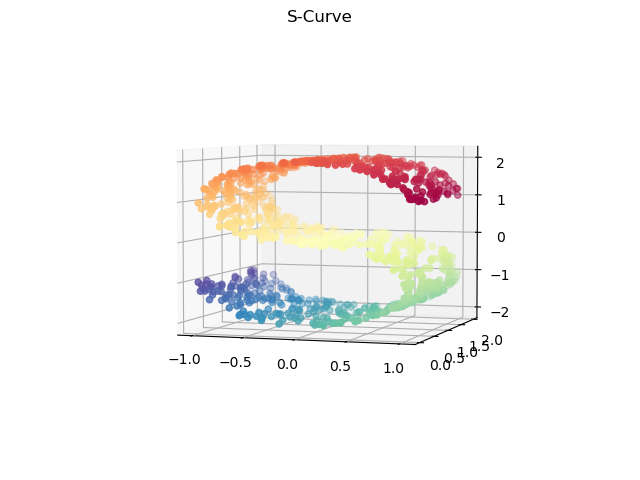

In [72]:
fig_s_curve = plt.figure()
fig_s_curve.suptitle('S-Curve')
    
colorize = dict(c=angle, cmap=plt.cm.Spectral)
# Add 3d scatter plot
ax = fig_s_curve.add_subplot(projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:], **colorize)
ax.view_init(4, -72)

In [73]:
def compute_spearman(x,n_neighbors):
    neighs,indxs = nearest_neighbor_distance(x,n_neighbors)
    n_comp = x.shape[1]
    f_d = np.zeros((n_comp,n_comp))

    a = np.linspace(0,n_comp-1, num=n_comp,dtype=int)
    for row in range(n_comp):
        vals = [i for i in a if i not in indxs[row]]
        sub_indices = np.ix_([row],vals)
        f_d[sub_indices] = 0

        sub_indices = np.ix_([row],indxs[row])
        vals = [i for i in a if i not in indxs[row]]
        f_d[sub_indices] = neighs[row]

    # Step 2.
    # Find shortest paths
    from scipy.sparse import csr_matrix
    from scipy.sparse.csgraph import shortest_path

    graph = csr_matrix(f_d)
    dist_matrix,predecessors = shortest_path(csgraph=graph, directed=False,return_predecessors=True)
    return dist_matrix

**Optimizing k**

In [75]:
spearman_ls = []
for k in range(5,50):
    data=X #datapointintheoriginalspace
    n_dim=2
    Y=lle(data,n_components=n_dim,n_neighbors=k,dist_func=nearest_neighbor_distance,reg_func=None)
    dist = compute_spearman(data,k)
    dist2 = compute_spearman(Y,k)
    coef, p = spearmanr(dist, dist2,axis=None)
    spearman_ls.append(coef)
    print("k:",k," Spearman coeff:",coef)

k: 5  Spearman coeff: 0.5599523244497002
k: 6  Spearman coeff: 0.6650409060100971
k: 7  Spearman coeff: 0.7860567217062783
k: 8  Spearman coeff: 0.9576134864732848
k: 9  Spearman coeff: 0.9573692020533122
k: 10  Spearman coeff: 0.9497550650007742
k: 11  Spearman coeff: 0.9439200898245973
k: 12  Spearman coeff: 0.9324822416473467
k: 13  Spearman coeff: 0.9262989426157944
k: 14  Spearman coeff: 0.9261315611993031
k: 15  Spearman coeff: 0.9240425707586442
k: 16  Spearman coeff: 0.9177464077164895
k: 17  Spearman coeff: 0.9066198421603898
k: 18  Spearman coeff: 0.9052886134863369
k: 19  Spearman coeff: 0.9023108419696573
k: 20  Spearman coeff: 0.9013331759486601
k: 21  Spearman coeff: 0.9006075510241228
k: 22  Spearman coeff: 0.9012676142692496
k: 23  Spearman coeff: 0.9055947713925172
k: 24  Spearman coeff: 0.9034291206634407
k: 25  Spearman coeff: 0.8971747968481006
k: 26  Spearman coeff: 0.8932738652318944
k: 27  Spearman coeff: 0.896383993413724
k: 28  Spearman coeff: 0.892480027966605

<IPython.core.display.Javascript object>


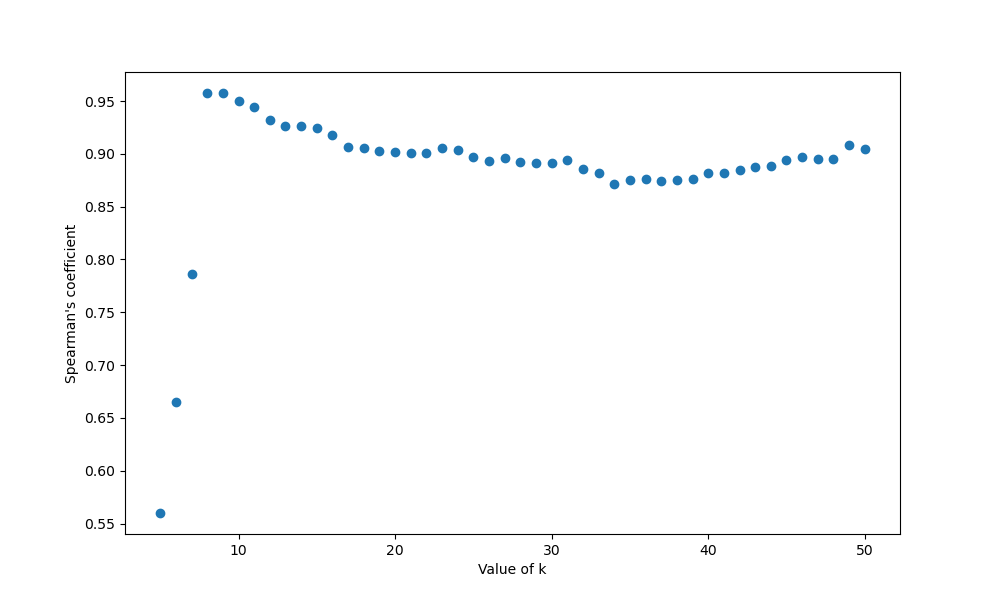

Text(0, 0.5, "Spearman's coefficient")

In [77]:
epoch_ls = [i+5 for i in range(len(spearman_ls))]
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(epoch_ls,spearman_ls)
plt.xlabel("Value of k")
plt.ylabel("Spearman's coefficient")

**Optimizing epsilon**

In [99]:
spearman_ls = []
ep_vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for ep in ep_vals:
    data=X #datapointintheoriginalspace
    n_dim=2
    Y=lle(data,n_components=n_dim,epsilon=ep,dist_func=fixed_radius_distance,reg_func=None)
    dist = compute_spearman(data,k)
    dist2 = compute_spearman(Y,k)
    coef, p = spearmanr(dist, dist2,axis=None)
    spearman_ls.append(coef)
    print("epsilon:",ep," Spearman coeff:",coef)

epsilon: 0.1  Spearman coeff: 0.01138851187558783
epsilon: 0.2  Spearman coeff: 0.7016921547365575
epsilon: 0.3  Spearman coeff: 0.9416302864512079
epsilon: 0.4  Spearman coeff: 0.9319637502878948
epsilon: 0.5  Spearman coeff: 0.9270453094498718
epsilon: 0.6  Spearman coeff: 0.9257187942705691
epsilon: 0.7  Spearman coeff: 0.9302047488393484
epsilon: 0.8  Spearman coeff: 0.9448799336224684


<IPython.core.display.Javascript object>


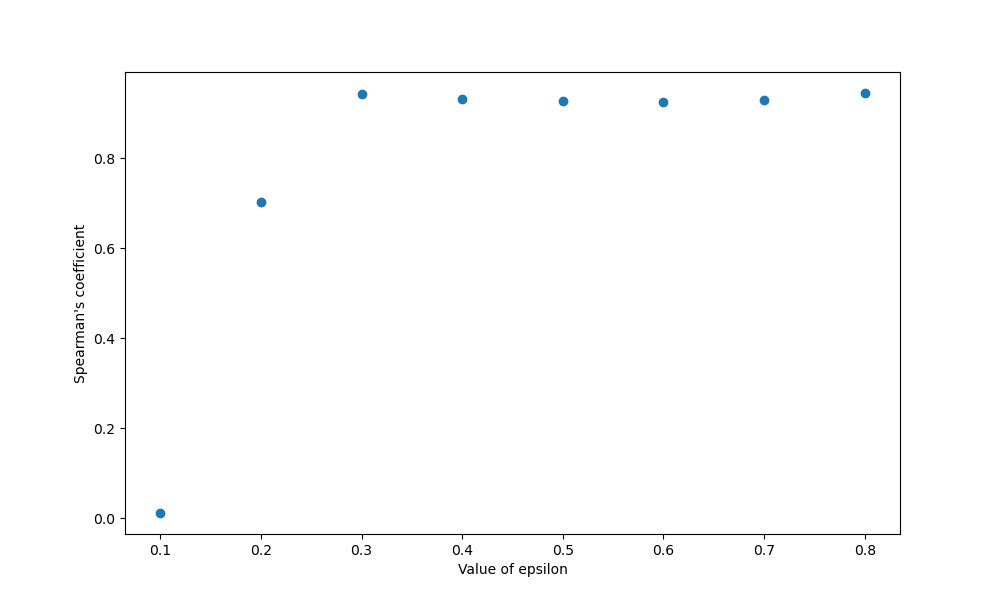

Text(0, 0.5, "Spearman's coefficient")

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(ep_vals,spearman_ls)
plt.xlabel("Value of epsilon")
plt.ylabel("Spearman's coefficient")

It is not necessary to find the optimal number of the nearest neighbours, but it is enough to estimate a proper range of neighbourhood sizes. <br>
In order to quantitatively estimate the topology preservation, we compute Spearman’s coefficient. It estimates the correlation of rank order data, i.e., how well the corresponding low-dimensional projection preserves the order of the pairwise distances between the high-dimensional data points converted to ranks. [Reference Paper](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.189.3218&rep=rep1&type=pdf)
<br><br>
Since we need to preserve the geodesic distance, it makes most sense to compute the geodesic distance in higher dimension rather than comparing the euclidean distance which won't be a good indicator of the whether the geometry of the figure has been preserved or not.

<br>
Additionally, when the relationship between the data is not linear(which is the main use-case of LLE), it is more appropriate to use the Spearman rank correlation method. 
<a href="http://geoinfo.amu.edu.pl/qg/archives/2011/QG302_087-093.pdf">Reference Paper</a>

Since the Spearman coefficient is the maximum for k=8 and epsilon them as the optimal hyperparameters

<IPython.core.display.Javascript object>


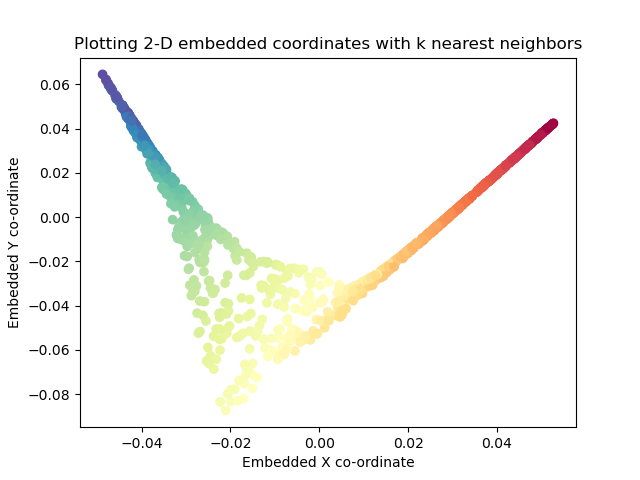

Text(0, 0.5, 'Embedded Y co-ordinate')

In [104]:
from Code.lle import lle
data=X#datapointintheoriginalspace
n_dim=2
k=8
Y=lle(data,n_components=n_dim,n_neighbors=k,dist_func=nearest_neighbor_distance,reg_func=None)

fig_s_curve = plt.figure()

colorize = dict(c=angle, cmap=plt.cm.Spectral)

# Add 3d scatter plot
ax = fig_s_curve.add_subplot()
ax.scatter(Y[0,:], Y[1,:],**colorize)
plt.title("Plotting 2-D embedded coordinates with k nearest neighbors")
plt.xlabel("Embedded X co-ordinate")
plt.ylabel("Embedded Y co-ordinate")

<IPython.core.display.Javascript object>


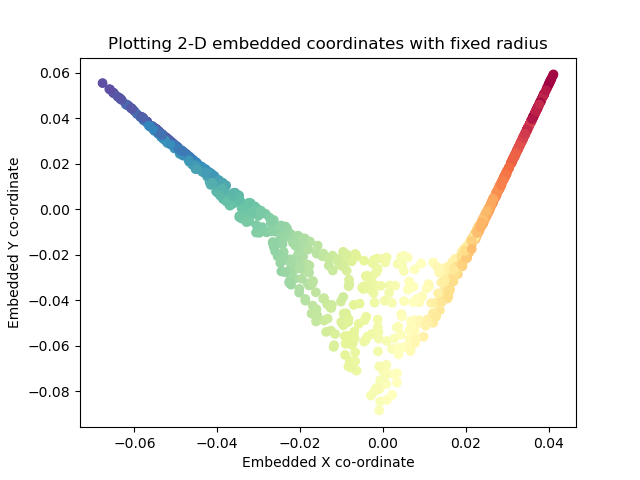

Text(0, 0.5, 'Embedded Y co-ordinate')

In [105]:
from Code.lle import lle
data=X#datapointintheoriginalspace
n_dim=2
ep=0.3
Y=lle(data,n_components=n_dim,epsilon=0.3,dist_func=fixed_radius_distance,reg_func=None)

fig_s_curve = plt.figure()

colorize = dict(c=angle, cmap=plt.cm.Spectral)

# Add 3d scatter plot
ax = fig_s_curve.add_subplot()
ax.scatter(Y[0,:], Y[1,:],**colorize)
plt.title("Plotting 2-D embedded coordinates with fixed radius")
plt.xlabel("Embedded X co-ordinate")
plt.ylabel("Embedded Y co-ordinate")

In [118]:
from Code.dataset import bars

data_bar, centers = bars()
data_bar = data_bar.T
centers = centers.T
image_size = [40,40]

In [119]:
def reg_func(C, K):
    trace = np.trace(C)
    return 1e-3*trace*K*np.eye(K)

In [120]:
spearman_ls = []
for k in range(40,61,1):
    data=data_bar #datapointintheoriginalspace
    n_dim=2
    Y=lle(data,n_components=n_dim,n_neighbors=k,dist_func=nearest_neighbor_distance,reg_func=reg_func)
    dist = compute_spearman(data,k)
    dist2 = compute_spearman(Y,k)
    coef, p = spearmanr(dist, dist2,axis=None)
    spearman_ls.append(coef)
    print("k:",k," Spearman coeff:",coef)

k: 40  Spearman coeff: 0.8648708690243235
k: 41  Spearman coeff: 0.8698874572958276
k: 42  Spearman coeff: 0.8796188145677812
k: 43  Spearman coeff: 0.8848579811784636
k: 44  Spearman coeff: 0.8914502570559047
k: 45  Spearman coeff: 0.8961502913384817
k: 46  Spearman coeff: 0.9005931406238958
k: 47  Spearman coeff: 0.9061988515948469
k: 48  Spearman coeff: 0.9098265523333655
k: 49  Spearman coeff: 0.9139522804303821
k: 50  Spearman coeff: 0.9177047173361726
k: 51  Spearman coeff: 0.9222303485403016
k: 52  Spearman coeff: 0.9249527252373363
k: 53  Spearman coeff: 0.927468638234379
k: 54  Spearman coeff: 0.9298130700346472
k: 55  Spearman coeff: 0.931618623326382
k: 56  Spearman coeff: 0.9329980812739175
k: 57  Spearman coeff: 0.9338975708501793
k: 58  Spearman coeff: 0.9350118549977663
k: 59  Spearman coeff: 0.9360276945708964
k: 60  Spearman coeff: 0.9367440853932406


In [137]:
from Code.lle import lle
data=data_bar #datapointintheoriginalspace
n_dim=2
k=59
Y=lle(data_bar,n_components=n_dim,n_neighbors=k,dist_func=nearest_neighbor_distance,reg_func=reg_func)

<IPython.core.display.Javascript object>


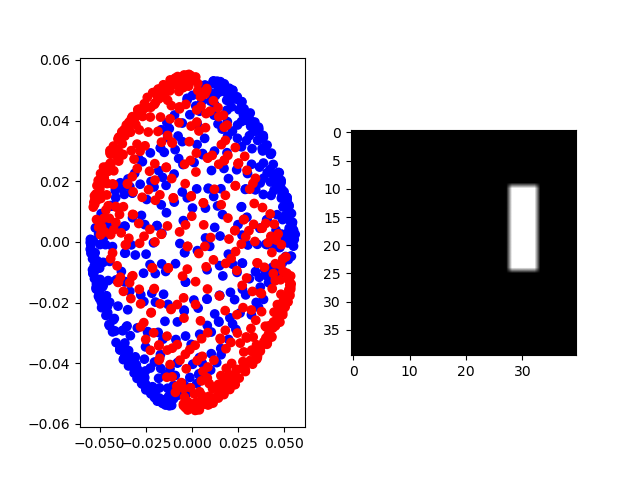

In [140]:
fig_bar=plt.figure()
vis_v=VIS_Bars(data=data_bar,proj=Y,fig_vis=fig_bar,color='r',image_size=image_size,both=True)

<IPython.core.display.Javascript object>


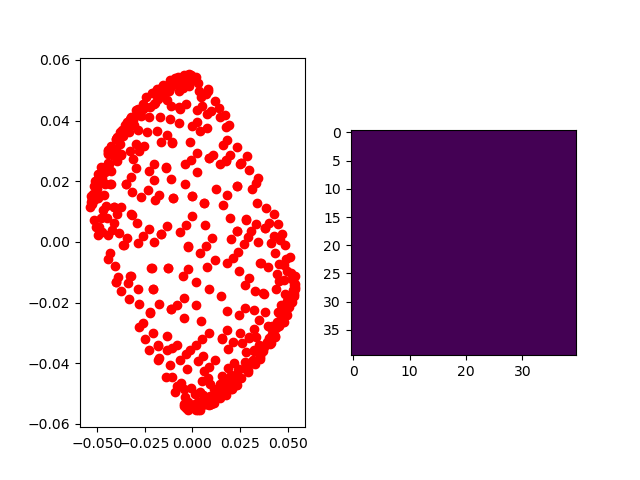

In [139]:
fig_bar=plt.figure()
vis_v=VIS_Bars(data=data_bar[:,500:],proj=Y[:,500:],fig_vis=fig_bar,color='r',image_size=image_size,both=False)

The embedded points represent the horizontal and vertical bars<br>Upon inspection with the original manifold shape, we can confirm that blue dots represent the vertical bars and the red dots represent the horizontal bars.<br>
There is some overlap between the both, which is in accordance with the dataset, and we can confirm that the dimensionality reduction has been performed successfully